In [1]:
%matplotlib inline
import os, pickle, string
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

font_path = "/home/zhoujb/local/font/times.ttf"
mpl.font_manager.fontManager.addfont(font_path)
prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
plt.rcParams['pdf.fonttype'] = 42

TEST_RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/ML/tesRes/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/ML/figRes/"

In [2]:
data_for_plot = pd.DataFrame()
file_list = os.listdir(TEST_RES_PATH)
for file_name in file_list:
    #print(file_name)
    with open(os.path.join(TEST_RES_PATH, file_name), "rb") as f:
        tmp_data = pickle.load(f)
        tmp_data = tmp_data.rename(columns={"Type":"Metrics"})
        tmp_data["Type"] = file_name.split("_")[0]
        data_for_plot = pd.concat([data_for_plot, tmp_data], axis=0, sort=False)

#data_for_plot = data_for_plot.replace({'tabPFN_ALL':'TN_ALL', 'tabPFN_FS':'TN_FS'})
data_for_plot["Model"] = data_for_plot["Model"].astype("category")
cat_order = ['CB_ALL', 'CB_RFA', 'CB_RFE', 'LB_ALL', 'LB_RFA', 'LB_RFE', 'tabPFN_ALL', 'tabPFN_FS']
data_for_plot["Model"] = data_for_plot["Model"].cat.reorder_categories(cat_order, ordered=True)

data_for_plot["Type"] = data_for_plot["Type"].astype("category")
#cat_order = ['PL', 'GNP', 'TSW', 'PSugar', 'PStarch', 'PProtein']
cat_order = ['PL', 'PC', 'PSugar', 'PStarch']
data_for_plot["Type"] = data_for_plot["Type"].cat.reorder_categories(cat_order, ordered=True)

/data2/zhoujb/anaconda3/envs/scRNAML/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


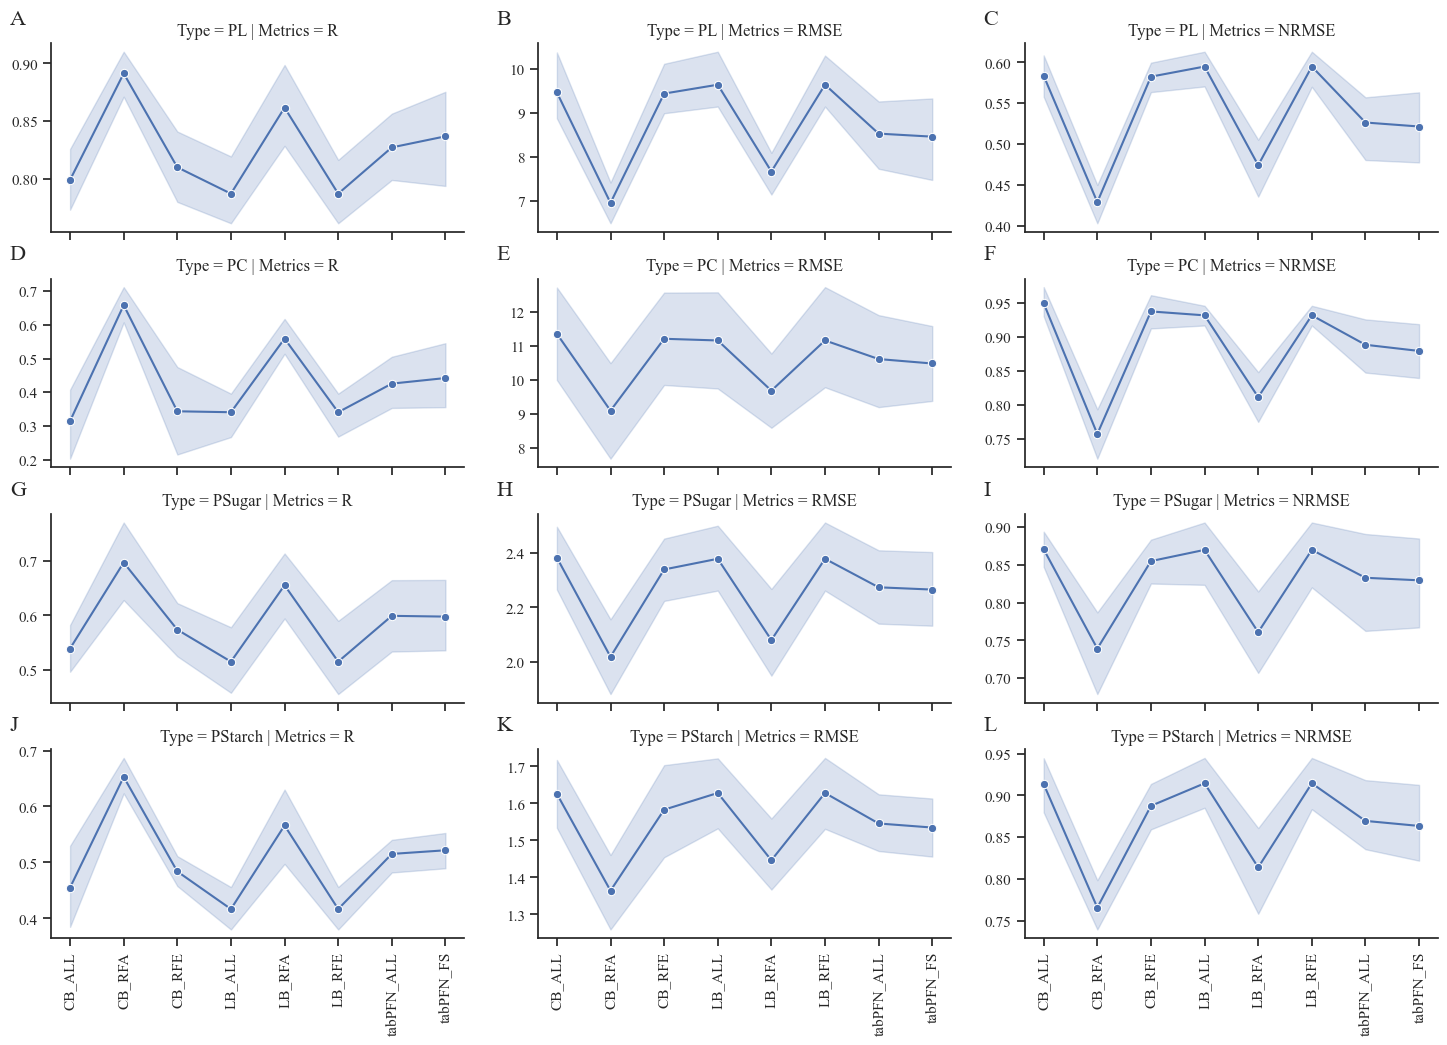

In [3]:
sns.set(font_scale=1, style="ticks")

mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]

g = sns.relplot(
    data=data_for_plot, x="Model", y="Score", 
    col="Metrics", row="Type",  kind="line", marker='o', height=2.5, aspect=2, facet_kws=dict(sharey=False, sharex=True)
)

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

#add % change text to subplots 
for ax, val in zip(g.axes.flat, list(string.ascii_uppercase)):
    mpl.rcParams['font.family'] = prop.get_name()
    mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
    ax.text(-0.1, 1.1, val, transform=ax.transAxes, fontsize=16, weight='bold')

g.set(xlabel="", ylabel="")


plt.savefig(os.path.join(FIG_PATH, "fig_3.pdf"), format="pdf", bbox_inches='tight')
plt.savefig(os.path.join(FIG_PATH, "fig_3.svg"), format="svg", bbox_inches='tight')

/data2/zhoujb/anaconda3/envs/PyTorchTabular/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


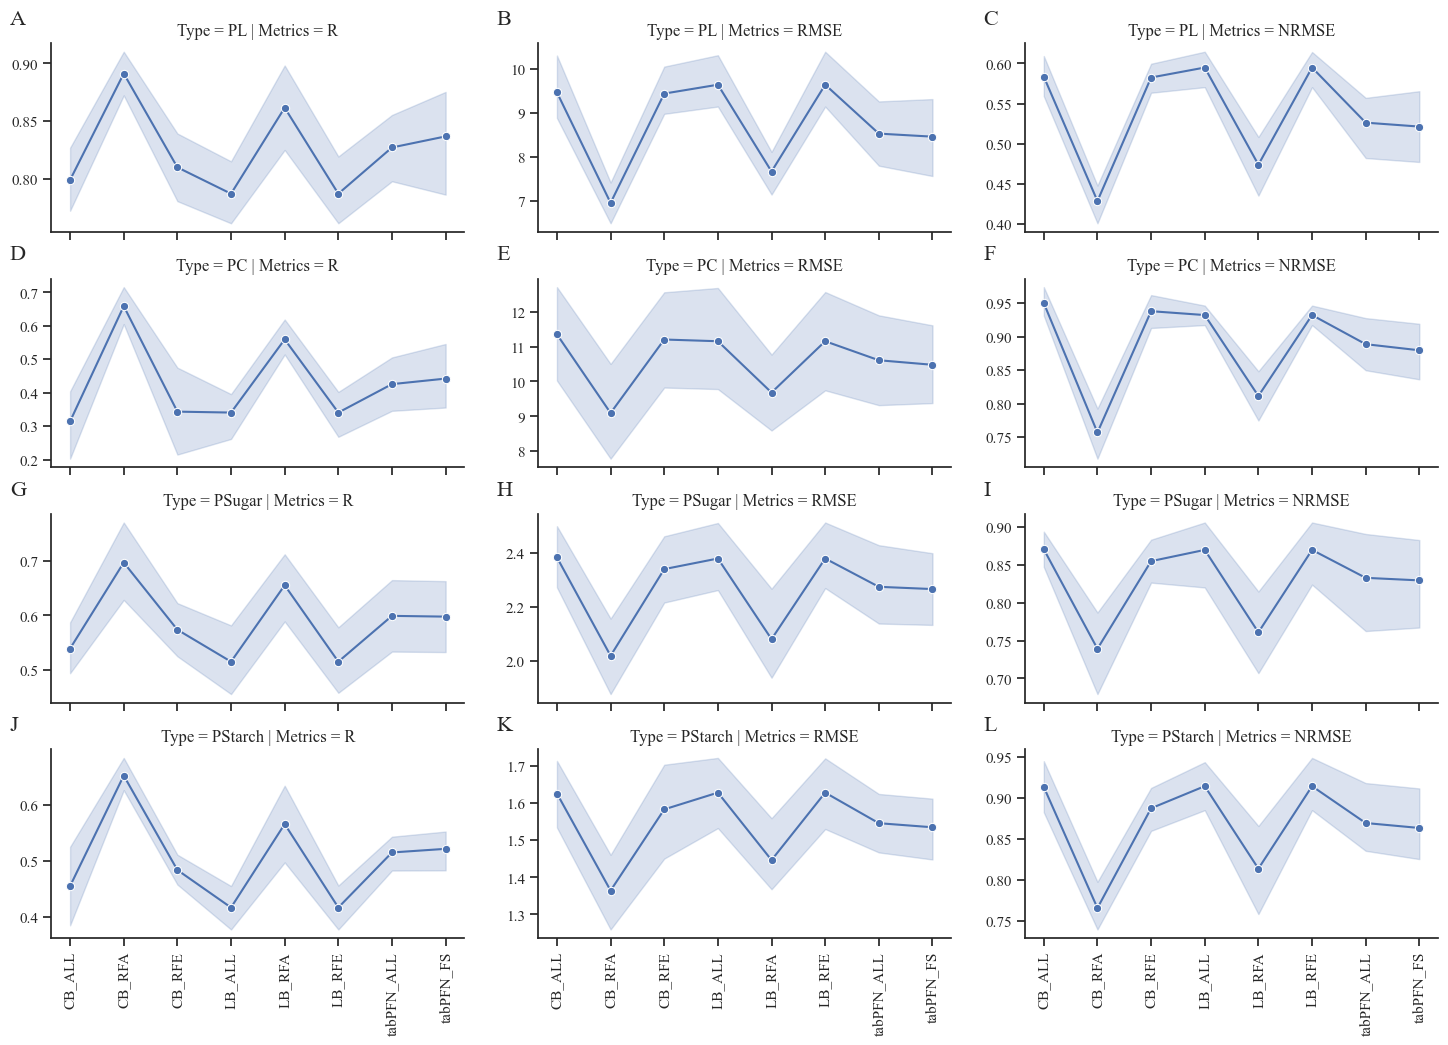

In [4]:
sns.set(font_scale=1, style="ticks")

mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]

g = sns.relplot(
    data=data_for_plot, x="Model", y="Score", 
    col="Metrics", row="Type",  kind="line", marker='o', height=2.5, aspect=2, facet_kws=dict(sharey=False, sharex=True)
)

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

#add % change text to subplots 
for ax, val in zip(g.axes.flat, list(string.ascii_uppercase)):
    mpl.rcParams['font.family'] = prop.get_name()
    mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
    ax.text(-0.1, 1.1, val, transform=ax.transAxes, fontsize=16, weight='bold')

g.set(xlabel="", ylabel="")


plt.savefig(os.path.join(FIG_PATH, "fig_3.pdf"), format="pdf", bbox_inches='tight')
plt.savefig(os.path.join(FIG_PATH, "fig_3.svg"), format="svg", bbox_inches='tight')